## Eden Duktzayev 316365733 and shiraz yeshayahu 209086768

In [173]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading from the data

In [174]:
datafile = "C:/Users/edend/OneDrive/שולחן העבודה/LP_destinations.csv"

In [175]:
data = pd.read_csv((datafile),encoding='ISO-8859-1')
data

,city,country,description
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...
1,Athens,Greece,"With equal measures of grunge and grace, Athen..."
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir..."
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...
...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi..."
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant..."


### counts the number of words 

In [176]:
data['num_of_words'] = data['description'].apply(lambda n: len(n.split(" ")))
data

,city,country,description,num_of_words
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,112
1,Athens,Greece,"With equal measures of grunge and grace, Athen...",393
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,147
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",390
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,419
...,...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...,412
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,410
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",406
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",118


### the text of the description column after removing all new line characters (\n) and all punctuation marks 

In [177]:
data['No_punct_description'] = data['description'].str.replace(r'[^\w\s]+', '').replace('/n', '')
data

,city,country,description,num_of_words,No_punct_description
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,112,Once seen simply as the gateway to the Turkish...
1,Athens,Greece,"With equal measures of grunge and grace, Athen...",393,With equal measures of grunge and grace Athens...
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,147,Endless bluesky days and a coastline riddled w...
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",390,Same same but different This Thailish Tshirt p...
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,419,Barcelona is an enchanting seaside city with b...
...,...,...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...,412,Imagine the audacity of building a city of mar...
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,410,Baroque streetscapes and imperial palaces set ...
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",406,A phoenix arisen from the ashes Polands capita...
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",118,Zakynthos also known by its Italian name Zante...


### the number of times the word “restaurant” appears in the description

In [178]:
data['has_restaurants'] = data['description'].str.count('restaurant')
data

,city,country,description,num_of_words,No_punct_description,has_restaurants
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,112,Once seen simply as the gateway to the Turkish...,0
1,Athens,Greece,"With equal measures of grunge and grace, Athen...",393,With equal measures of grunge and grace Athens...,1
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,147,Endless bluesky days and a coastline riddled w...,0
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",390,Same same but different This Thailish Tshirt p...,1
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,419,Barcelona is an enchanting seaside city with b...,1
...,...,...,...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...,412,Imagine the audacity of building a city of mar...,0
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,410,Baroque streetscapes and imperial palaces set ...,1
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",406,A phoenix arisen from the ashes Polands capita...,1
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",118,Zakynthos also known by its Italian name Zante...,0


### the number of times the word “museum” appears in the description

In [179]:
data['has_museums'] = data['description'].str.count('museum')
data

,city,country,description,num_of_words,No_punct_description,has_restaurants,has_museums
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,112,Once seen simply as the gateway to the Turkish...,0,1
1,Athens,Greece,"With equal measures of grunge and grace, Athen...",393,With equal measures of grunge and grace Athens...,1,0
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,147,Endless bluesky days and a coastline riddled w...,0,0
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",390,Same same but different This Thailish Tshirt p...,1,0
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,419,Barcelona is an enchanting seaside city with b...,1,2
...,...,...,...,...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...,412,Imagine the audacity of building a city of mar...,0,0
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,410,Baroque streetscapes and imperial palaces set ...,1,3
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",406,A phoenix arisen from the ashes Polands capita...,1,2
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",118,Zakynthos also known by its Italian name Zante...,0,0


### the number of times the words “beach” or “ocean” or “sea” appears in the description

In [180]:
x = data['description'].str.count('beach')
y = data['description'].str.count('sea')
z = data['description'].str.count('ocean')
w = x + y + z

In [181]:
data['has_beaches'] = w
data

,city,country,description,num_of_words,No_punct_description,has_restaurants,has_museums,has_beaches
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,112,Once seen simply as the gateway to the Turkish...,0,1,1
1,Athens,Greece,"With equal measures of grunge and grace, Athen...",393,With equal measures of grunge and grace Athens...,1,0,2
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,147,Endless bluesky days and a coastline riddled w...,0,0,2
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",390,Same same but different This Thailish Tshirt p...,1,0,0
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,419,Barcelona is an enchanting seaside city with b...,1,2,7
...,...,...,...,...,...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...,412,Imagine the audacity of building a city of mar...,0,0,2
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,410,Baroque streetscapes and imperial palaces set ...,1,3,0
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",406,A phoenix arisen from the ashes Polands capita...,1,2,1
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",118,Zakynthos also known by its Italian name Zante...,0,0,0


### the average number of words in the description column

In [182]:
avg_num_of_words = data['num_of_words'].mean()
avg_num_of_words

272.5131578947368

### the city with the longest description column 

In [183]:
max = data['num_of_words'].max()
for i in range(len(data)):
    if data['num_of_words'][i] == max:
        print(data['city'][i])

Florence


### histogram of the column "num_of_words"

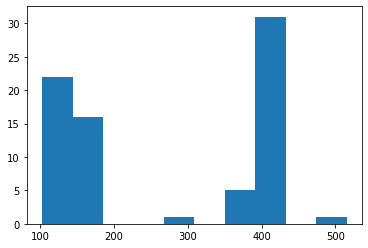

In [184]:
plt.hist(data['num_of_words'])
plt.show() 

### scatter plot that shows the relationship between number of beaches and number of restaurants

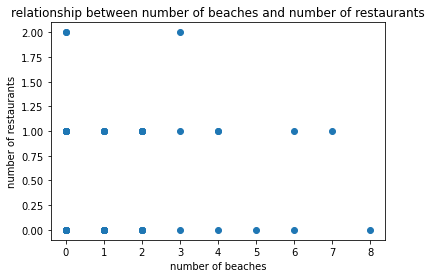

In [185]:
plt.scatter(data['has_beaches'], data['has_restaurants'])
plt.xlabel("number of beaches")
plt.ylabel("number of restaurants")
plt.title("relationship between number of beaches and number of restaurants")
plt.show()

### scatter plot that shows the relationship between number of museums and the number of beaches

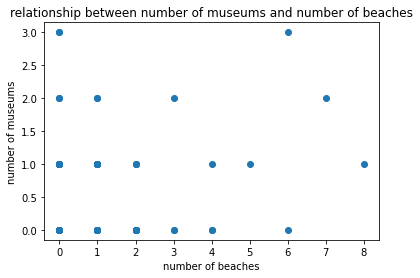

In [186]:
plt.scatter(data['has_beaches'], data['has_museums'])
plt.xlabel("number of beaches")
plt.ylabel("number of museums")
plt.title("relationship between number of museums and number of beaches")
plt.show()